## HEARTH ATTACK PREDICTION

[The Dataset](https://www.kaggle.com/datasets/imnikhilanand/heart-attack-prediction) describes the contents of the heart-disease directory.   
<br>  
***
## Table of contents
1. [Data analysis and cleaning](#1.-Data-analysis-and-cleaning)
2. [XGBoost](#2.-XGBoost)
3. [KNN](#3.-KNN)
4. [Comparison](#4.-Comparison)

##    
***
### Attribute documentation:
- id: patient identification number
- age: age in years
- sex: sex (1 = male; 0 = female)
- cp: chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 
    - 3 = normal; 
    - 6 = fixed defect; 
    - 7 = reversable defect
- num: diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing 
    - Value 1: > 50% diameter narrowing
      (in any major vessel: attributes 59 through 68 are vessels)

[back to 'Table of contents'](##Table-of-contents)
***
### 1. Data analysis and cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


_Data contains missing data_ 
- Replacing **"?"**  with **None** 

In [3]:
df = df.replace("?", None)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,None,None,None,0
1,29,1,2,120,243,0,0,160,0,0.0,None,None,None,0
2,29,1,2,140,None,0,0,170,0,0.0,None,None,None,0
3,30,0,1,170,237,0,1,170,0,0.0,None,None,6,0
4,31,0,2,100,219,0,1,150,0,0.0,None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,None,None,None,1
290,54,0,3,130,294,0,1,100,1,0.0,2,None,None,1
291,56,1,4,155,342,1,0,150,1,3.0,2,None,None,1
292,58,0,2,180,393,0,0,110,1,1.0,2,None,7,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    293 non-null    object 
 4   chol        271 non-null    object 
 5   fbs         286 non-null    object 
 6   restecg     293 non-null    object 
 7   thalach     293 non-null    object 
 8   exang       293 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       104 non-null    object 
 11  ca          3 non-null      object 
 12  thal        28 non-null     object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


_Certain columns has improperly assigned Dtype as object (while it's integers) and some of data is missing_
- Removing columns with most data missing

In [5]:
df = df.drop(columns=["slope", "ca", "thal"])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,None,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [6]:
na_filter = df.isna().any(axis=1) # filter rows with missing data
df[na_filter]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
2,29,1,2,140,None,0,0,170,0,0.0,0
27,38,0,2,120,275,None,0,129,0,0.0,0
31,39,1,2,120,None,0,1,146,0,2.0,0
34,39,1,2,130,None,0,0,120,0,0.0,0
44,40,1,3,140,None,0,0,188,0,0.0,0
65,43,0,3,150,None,0,0,175,0,0.0,0
72,45,0,2,180,None,0,0,180,0,0.0,0
75,45,1,3,135,None,0,0,110,0,0.0,0
81,46,1,3,150,163,None,0,116,0,0.0,0
86,47,0,3,130,None,0,0,145,0,2.0,0


- Filling missing data with averange values

In [7]:
columns = ("trestbps", "chol", "fbs", "restecg", "thalach", "exang")
for column in columns:
    col_avg_data = int(df[column].dropna().astype(int).mean())
    df[column] = df[column].replace({None : col_avg_data})
df[na_filter]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
2,29,1,2,140,250,0,0,170,0,0.0,0
27,38,0,2,120,275,0,0,129,0,0.0,0
31,39,1,2,120,250,0,1,146,0,2.0,0
34,39,1,2,130,250,0,0,120,0,0.0,0
44,40,1,3,140,250,0,0,188,0,0.0,0
65,43,0,3,150,250,0,0,175,0,0.0,0
72,45,0,2,180,250,0,0,180,0,0.0,0
75,45,1,3,135,250,0,0,110,0,0.0,0
81,46,1,3,150,163,0,0,116,0,0.0,0
86,47,0,3,130,250,0,0,145,0,2.0,0


In [8]:
for c in df.select_dtypes("object").columns:
    df[c] = df[c].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    int32  
 4   chol        294 non-null    int32  
 5   fbs         294 non-null    int32  
 6   restecg     294 non-null    int32  
 7   thalach     294 non-null    int32  
 8   exang       294 non-null    int32  
 9   oldpeak     294 non-null    float64
 10  num         294 non-null    int64  
dtypes: float64(1), int32(6), int64(4)
memory usage: 18.5 KB


In [10]:
for c in df.columns:
    print(f"\"{c.upper()}\" column unique values: \n{df[c].unique()}")

"AGE" column unique values: 
[28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 65 66]
"SEX" column unique values: 
[1 0]
"CP" column unique values: 
[2 1 3 4]
"TRESTBPS" column unique values: 
[130 120 140 170 100 105 110 125 150  98 112 145 190 160 115 142 180 132
 135 108 124 113 122  92 118 106 200 138 136 128 155]
"CHOL" column unique values: 
[132 243 250 237 219 198 225 254 298 161 214 220 160 167 308 264 166 340
 209 260 211 173 283 194 223 315 275 297 292 182 200 204 241 339 147 273
 307 289 215 281 184 245 291 295 269 196 268 228 358 201 249 266 186 207
 218 412 224 238 230 163 240 280 257 263 276 284 195 227 253 187 202 328
 168 216 129 190 188 179 210 272 180 100 259 468 274 320 221 309 312 171
 208 246 305 217 365 344 394 256 326 277 270 229  85 347 251 222 287 318
 213 294 193 271 156 267 282 117 466 247 226 265 206 288 303 338 248 306
 529 392 231 329 355 233 242 603 255 172 175 290 341 234 342 404 518 285
 279 3

_Noticable white spaces in last colum name_

In [11]:
df.rename(columns={'num       ': 'num'}, inplace=True)

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'num'],
      dtype='object')

- Data cleaned, preparing for Machine Learning

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, f1_score, accuracy_score
target = 'num'
x = df.drop(target, axis=1)
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

[back to 'Table of contents'](##Table-of-contents)
***
### 2. XGBoost

In [14]:
import xgboost as xgb
ddm = xgb.DMatrix(data= x.values, label=y.values)

In [15]:
params = {"objective":"reg:squarederror", "max_depth":3, "learning_rate": 0.1}

- Definition of results plot

In [16]:
def cv_param_plot(data_dm, param_to_cv, params, params_value_array, rounds=10, figsize=(15, 10)):
    plt.figure(figsize=figsize)
    legend = []
    colors = ('r','g','b','c','m','y','black')
    for param in params_value_array:
        params[param_to_cv] = param
        cv_results = xgb.cv(dtrain=data_dm, params=params, num_boost_round=rounds, 
                                    metrics="rmse", as_pandas=True, seed=123)
        plt.plot(cv_results['train-rmse-mean'], color=colors[params_value_array.index(param)])
        plt.plot(cv_results['test-rmse-mean'], ls='dashed', color=colors[params_value_array.index(param)])
        legend.append(f'test  : {param}')
        legend.append(f'train : {param}')
    plt.legend(legend, title=(f"{param_to_cv} value"))
    plt.title(param_to_cv)
    plt.xlabel("Estimators")
    plt.ylabel("Mean square error");

- Searching for optimal learning rate

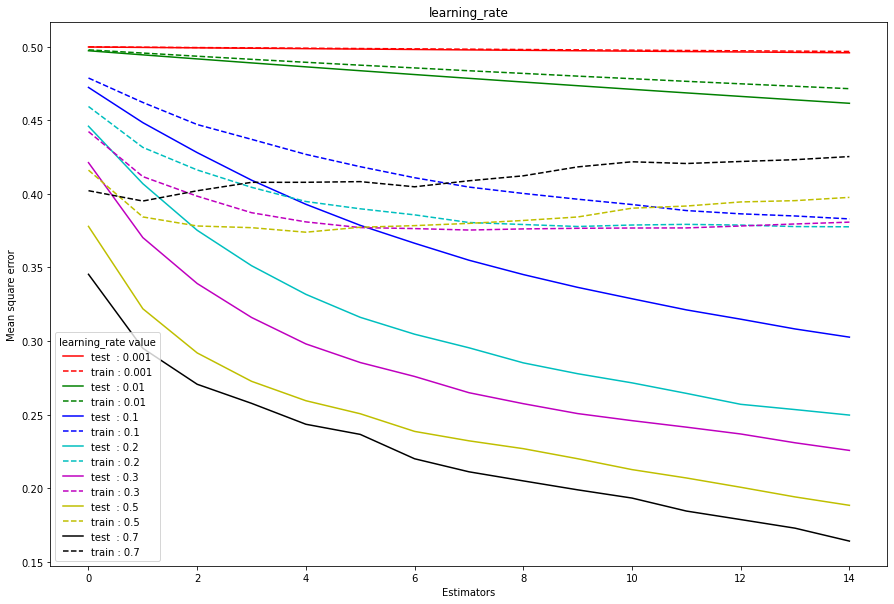

In [17]:
lr_array = [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7]
cv_param_plot(ddm, "learning_rate", params, lr_array, rounds=15)

_At first sight, seems that best value for learning rate is 0.5 with 4 estimators_
- Checking values closer to 0.5

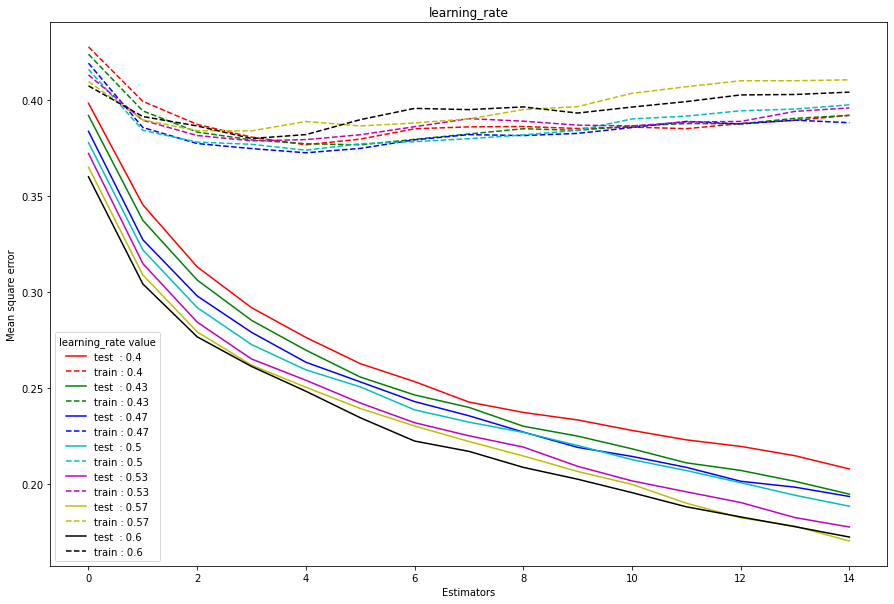

In [18]:
lr_array = [0.4, 0.43, 0.47, 0.5, 0.53, 0.57, 0.6]
cv_param_plot(ddm, "learning_rate", params, lr_array, rounds=15)

- Searching for optimal max_depth parapeter

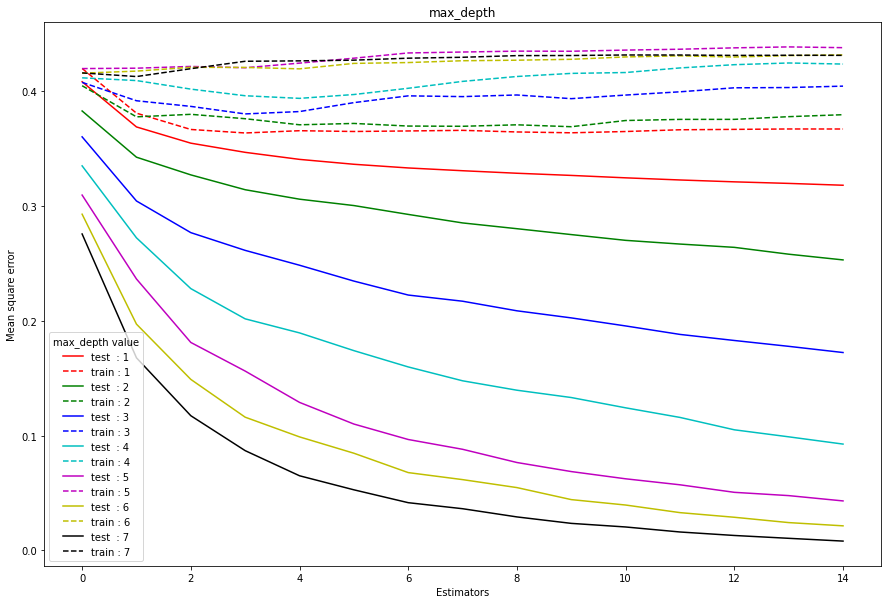

In [19]:
max_depth_array = list(range(1,8))

cv_param_plot(ddm, "max_depth", params, max_depth_array, rounds=15)

_**Conclusions:**_ 
- _optimal learning rate - 0.47_
- _optimal estimators count - 4 (higher values contributes to overfitting)_
- _optimal max_depth parameter - 1_

[back to 'Table of contents'](##Table-of-contents)
***
### 3. KNN

In [20]:
from scipy.stats import iqr
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

- Removing outliers for KNN algorithm

In [21]:
def rm_out(df):
    df_out = df.copy()
    means, stdevs = {}, {}
    for column in df_out.columns:
        means[column] = df_out[column].mean()
        stdevs[column] = df_out[column].std()
    for column in df_out.columns:
        lower = means[column] - 3 * stdevs[column]
        upper = means[column] + 3 * stdevs[column]
        index = (lower < df_out[column]) & (df_out[column] < upper)
        df_out = df_out[index]
    df_out.index = range(len(df_out))
    return df_out

In [22]:
df.shape

(294, 11)

_Shape of original DataFrame_

In [23]:
df_out = rm_out(df)
df_out.shape

(260, 11)

_Shape of DataFrame without outliers_

- Standardizing data and fitting into KNNclassifier

In [24]:
clipped_df = preprocessing.StandardScaler().fit_transform(df_out)

In [25]:
target = 'num'
kx = df.drop(target, axis=1)
ky = df[target]
kx_train, kx_test, ky_train, ky_test = train_test_split(kx, ky, test_size=0.2)
knn = KNeighborsClassifier().fit(kx_train, ky_train)

In [26]:
knn_pred = knn.predict(kx_test)

[back to 'Table of contents'](##Table-of-contents)
***
### 4. Comparison

- Predicting values for various XGBoost models

In [27]:
xgb1 = xgb.XGBClassifier().fit(x_train, y_train)
y1_pred = xgb1.predict(x_test)  # standard, without optimisation
xgb2 = xgb.XGBClassifier(learning_rate=0.47, n_estimators=4, max_depth=1).fit(x_train, y_train)
y2_pred = xgb2.predict(x_test)  # after optimisation
xgb3 = xgb.XGBClassifier().fit(kx_train, ky_train)
y3_pred = xgb3.predict(x_test)  # same DF as for KNN (without outliers)

In [28]:
models_score = {"XGBoost" : 
                        {"index" : 0,
                        "name" : "     XGBoostClassifier (default)"}, 
                "XGBoost-optimised" : 
                        {"index" : 1,
                        "name" : "   XGBoostClassifier - optimised"},
                "XGBoost-wo_outliers" :
                        {"index" : 2,
                        "name" : "XGBoostClassifier - w/o outliers"},
                "KNN" : 
                        {"index" : 3,
                        "name" : "           KNeighboursClassifier"}, 
                }
models_y = [y_test, y_test, ky_test, ky_test]
models_pred = [y1_pred, y2_pred, y3_pred, knn_pred]
for m in models_score:
    i = models_score[m]["index"]
    models_score[m]["AUC"] = round(roc_auc_score(models_y[i],models_pred[i]),5)
    models_score[m]["MSE"] = round(mean_squared_error(models_y[i],models_pred[i], squared=False),5)
    models_score[m]["F1-score"] = round(f1_score(models_y[i],models_pred[i]),5)
    models_score[m]["Accuracy"] = round(accuracy_score(models_y[i],models_pred[i]),5)

- Printing results

In [29]:
keys = ["name", "AUC", "RMSE", "F1-score", "Accuracy"]
print(" "*len(models_score['KNN']['name']),"|   AUC   |   MSE   |F1-score | Accuracy ")
for m in models_score:
    print(f"{models_score[m]['name']} | {models_score[m]['AUC']} | {models_score[m]['MSE']} | {models_score[m]['F1-score']} | {models_score[m]['Accuracy']}")

                                 |   AUC   |   MSE   |F1-score | Accuracy 
     XGBoostClassifier (default) | 0.79225 | 0.45099 | 0.76923 | 0.79661
   XGBoostClassifier - optimised | 0.78356 | 0.45099 | 0.73913 | 0.79661
XGBoostClassifier - w/o outliers | 0.47744 | 0.71307 | 0.375 | 0.49153
           KNeighboursClassifier | 0.62469 | 0.55234 | 0.47059 | 0.69492
